# Telecom Customer Churn Exploratory Data Analysis 

In [3]:
#Importing The Required Python Libraries 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick


## Summary Statistics

In [4]:
#importing the dataset
df=pd.read_csv('dataset.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### We can conclude that 75% of all customers have tenure below 55 months
##### The Average Monthly charges is 64.76 USD 
#### 25% of custoemrs pays more than 89.85 USD per month 


No     5174
Yes    1869
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

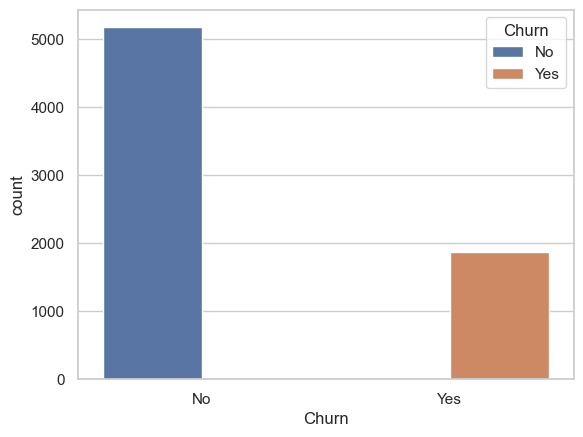

In [10]:
#Total Number Of churned customers 
sns.set_theme(style="whitegrid")
#sns.countplot(x=df['Churn'])
print(df['Churn'].value_counts())
sns.countplot(data=df,x='Churn',hue="Churn")

Text(0.5, 1.0, 'Distribution of Men Vs Female Customers')

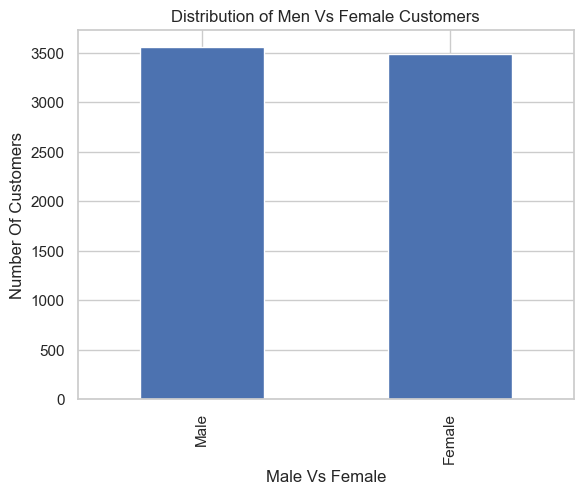

In [11]:
df['gender'].value_counts().plot(kind="bar")
plt.xlabel('Male Vs Female')
plt.ylabel('Number Of Customers')
plt.title('Distribution of Men Vs Female Customers')

In [12]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Distribution of Men Vs Female Customers')

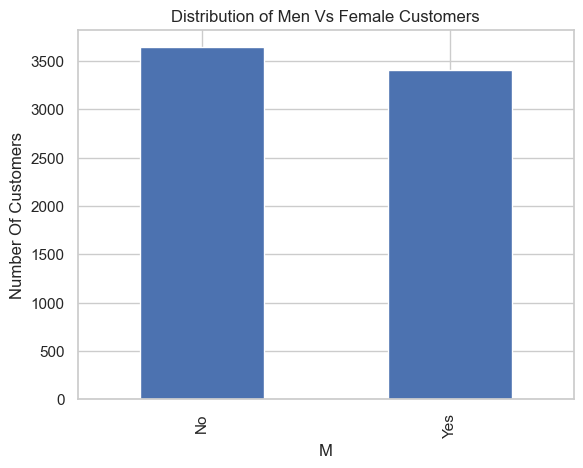

In [13]:
df['Partner'].value_counts().plot(kind="bar")
plt.xlabel('M')
plt.ylabel('Number Of Customers')
plt.title('Distribution of Men Vs Female Customers')

<Axes: xlabel='count', ylabel='Partner'>

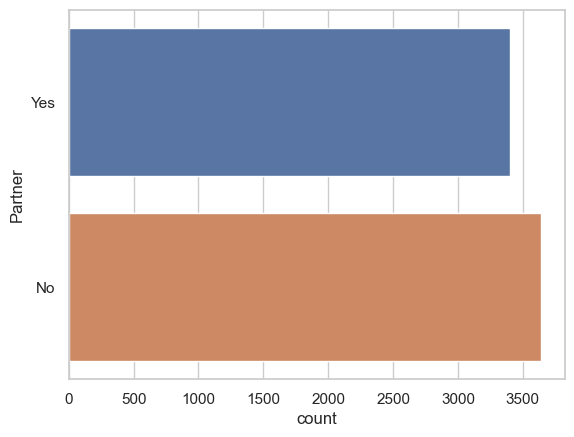

In [14]:
sns.countplot(data=df['Partner'], y=df['Partner'])


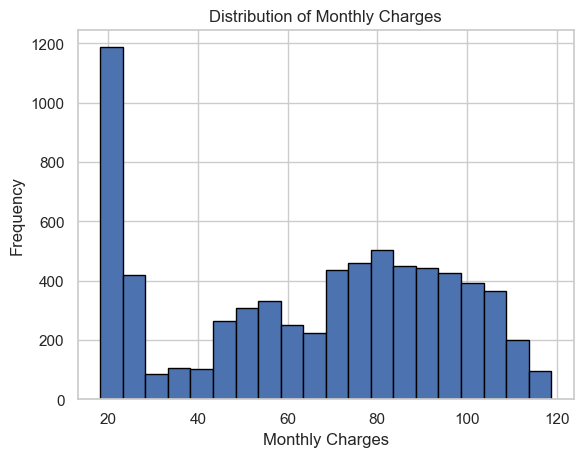

In [15]:
monthly_charges = df['MonthlyCharges']

# Create a histogram to visualize the distribution of monthly charges
plt.hist(monthly_charges, bins=20, edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [17]:
df.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#we have null values in the column that we have just changed its type , we neeed to delete those null values 
df.dropna(how='any',inplace=True)

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#Group the tenure in bins of 12 months
labels = ["{0}-{1}".format(i,i+11) for i in range(1,df['tenure'].max(),12)]
df['tenure_group']=pd.cut(df.tenure , range(1,80,12),right=False,labels=labels)
df['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [22]:
#removing the non required columns
df.drop(columns=['customerID','tenure'],axis=1,inplace=True)

## Exploratory Data Analysis

#### Univariate Analysis

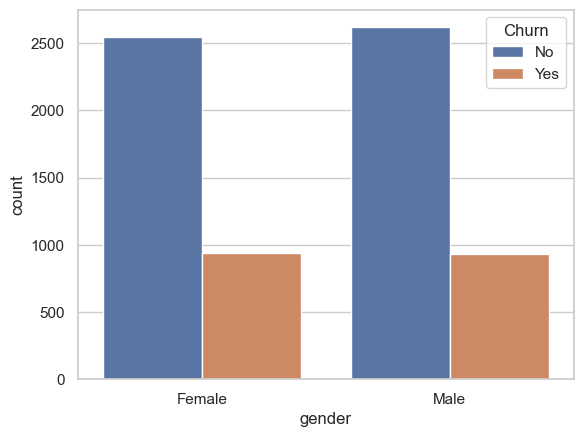

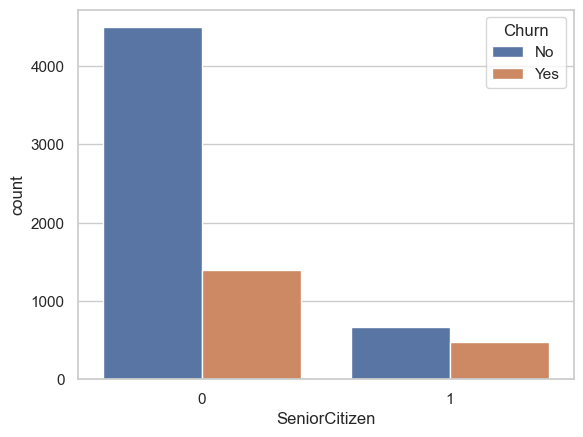

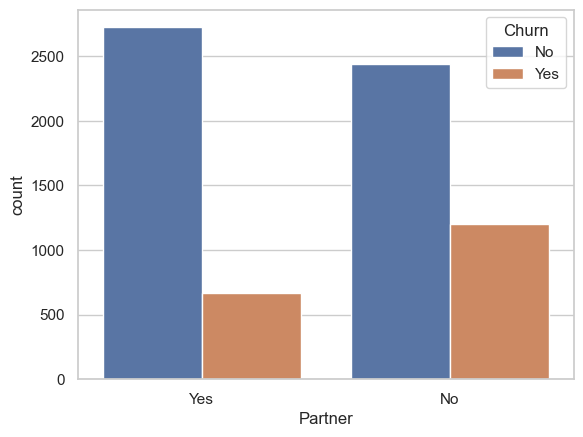

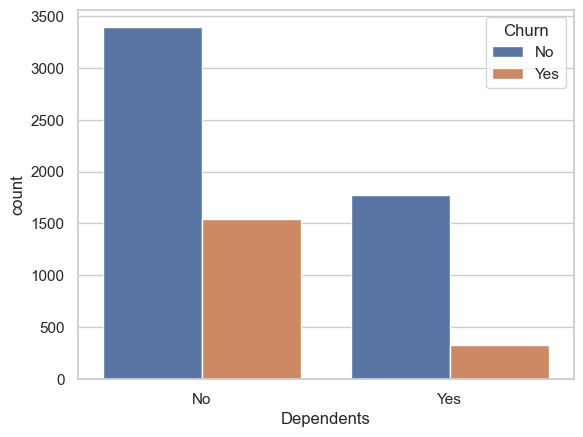

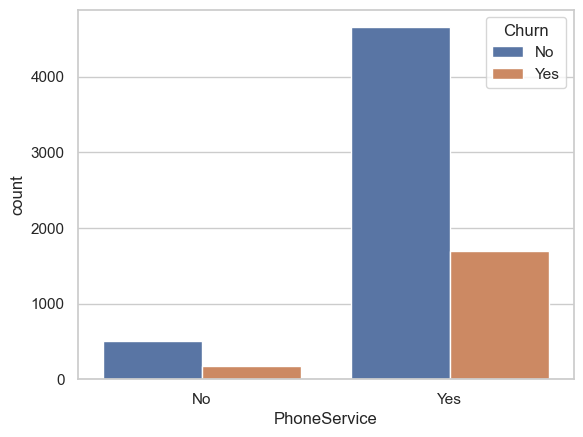

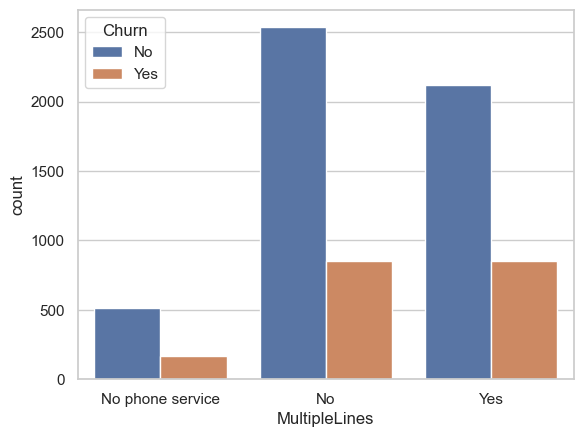

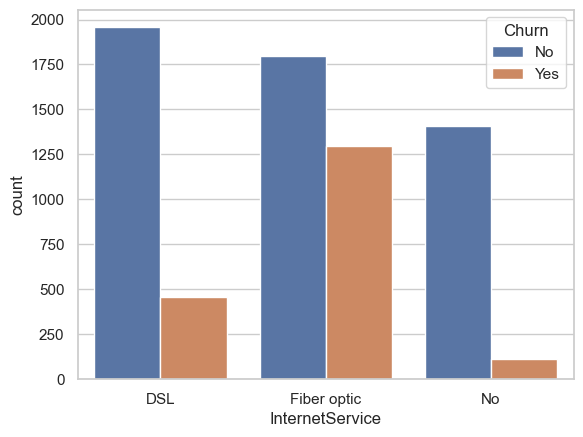

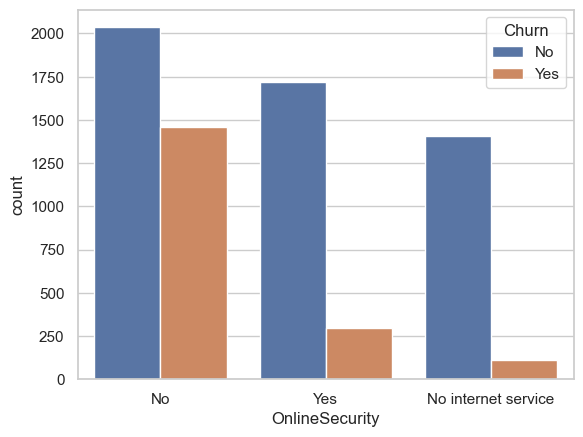

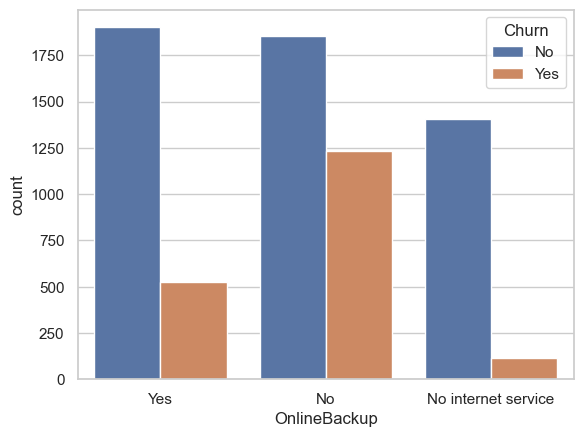

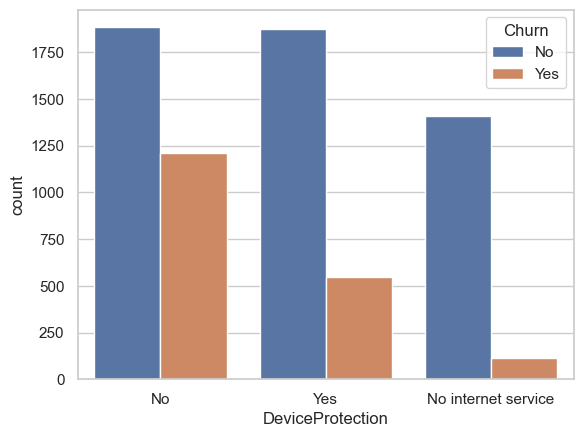

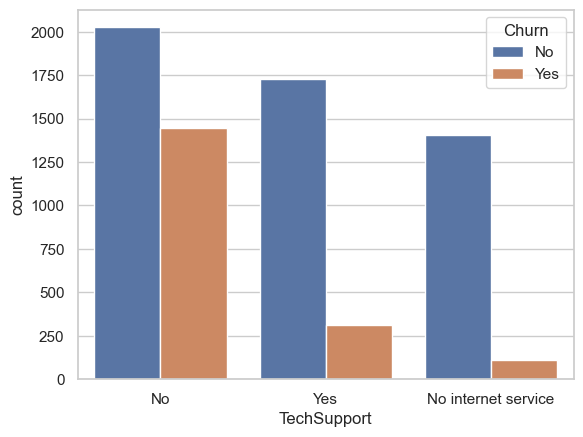

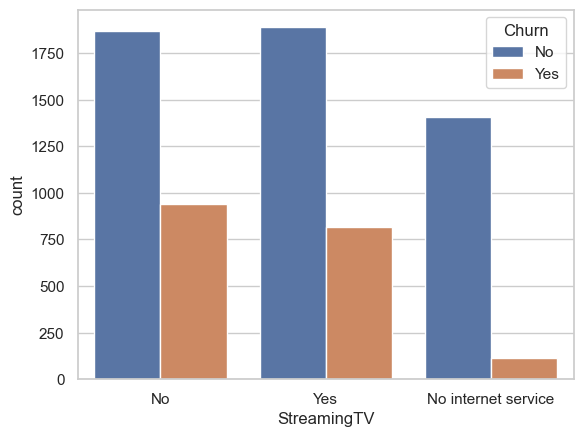

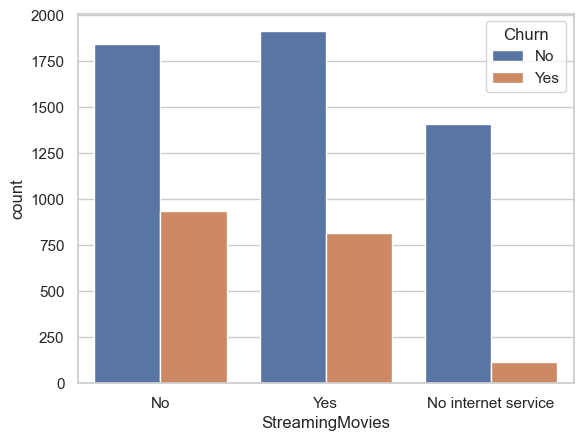

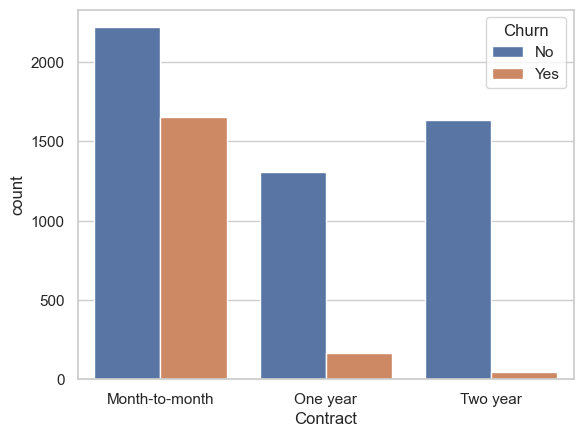

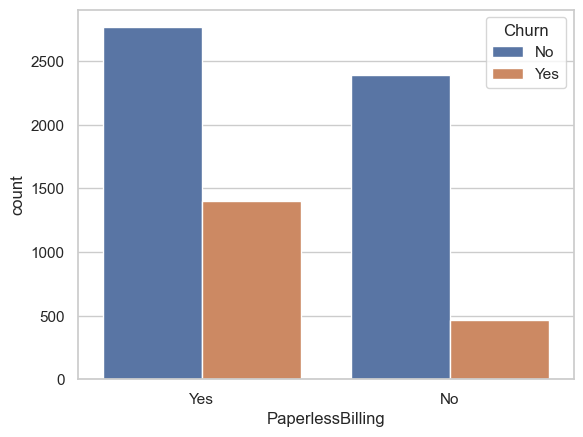

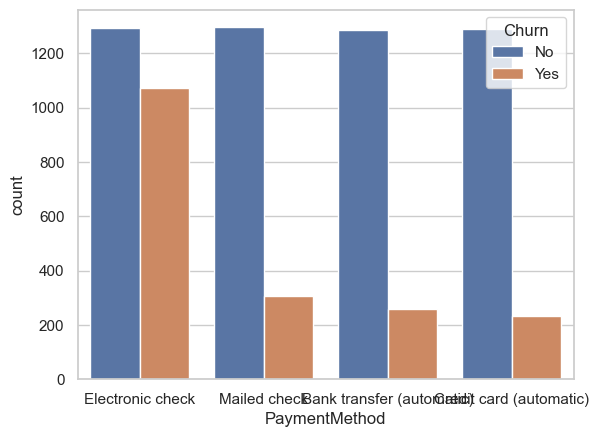

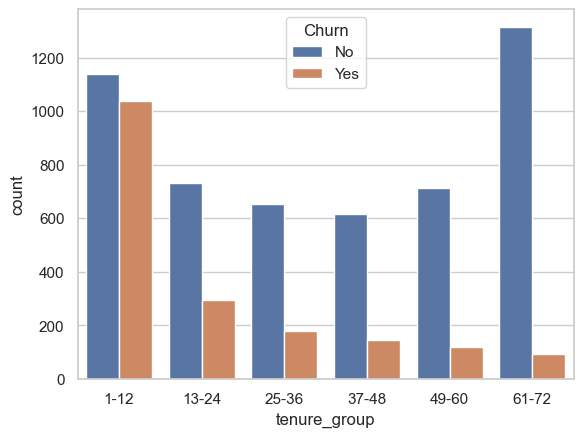

In [23]:
for fig , pred in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(fig)
    sns.countplot(data=df,x=pred,hue='Churn')

In [24]:
#The target variable is 'Churn ' we need to convert it to 1 for yes ,0 for no
df['Churn']=np.where(df.Churn =='Yes',1,0)
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [26]:
#Converting all categorical variables into dummy variavbles
df_dummies=pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int32  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [28]:
df_dummies.shape

(7032, 51)

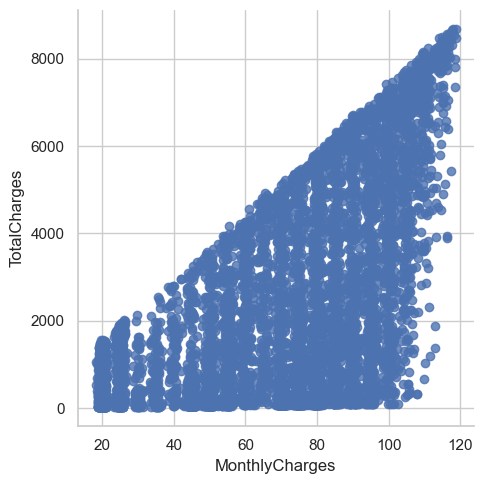

In [29]:
#relationship between monthly charges and total charges
sns.lmplot(data=df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

##### we see that monthly charges and total charges are positively correalted 

C:\Users\Firas\AppData\Local\Temp\ipykernel_33780\283314881.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
C:\Users\Firas\AppData\Local\Temp\ipykernel_33780\283314881.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Monthly Charges By Churn Attitude')

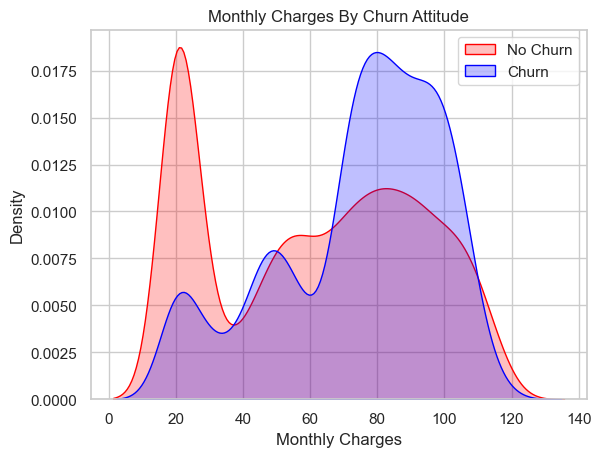

In [30]:
#churn attitudes by monthly charges 
monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)
monthly.legend(['No Churn','Churn'],loc='upper right')
monthly.set_ylabel('Density')
monthly.set_xlabel('Monthly Charges')
monthly.set_title('Monthly Charges By Churn Attitude')


C:\Users\Firas\AppData\Local\Temp\ipykernel_33780\3350335258.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
C:\Users\Firas\AppData\Local\Temp\ipykernel_33780\3350335258.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Total Charges By Churn Attitude')

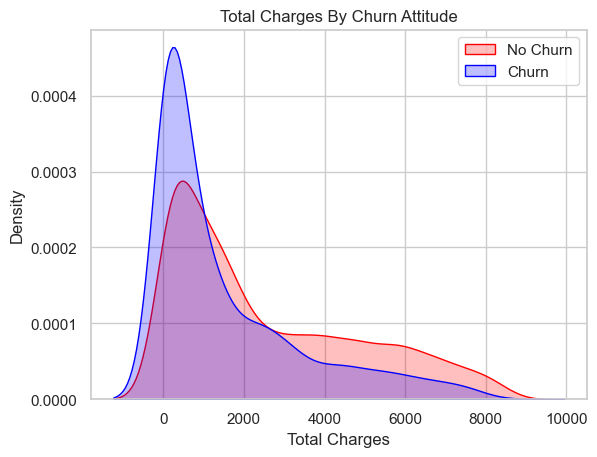

In [31]:
#churn attitudes by total charges 
monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)
monthly.legend(['No Churn','Churn'],loc='upper right')
monthly.set_ylabel('Density')
monthly.set_xlabel('Total Charges')
monthly.set_title('Total Charges By Churn Attitude')

##### We get higher churn attitude at lower total charges
##### Higher monthly charges + lower tenure = lower total charges => high churn attitude 

<Axes: >

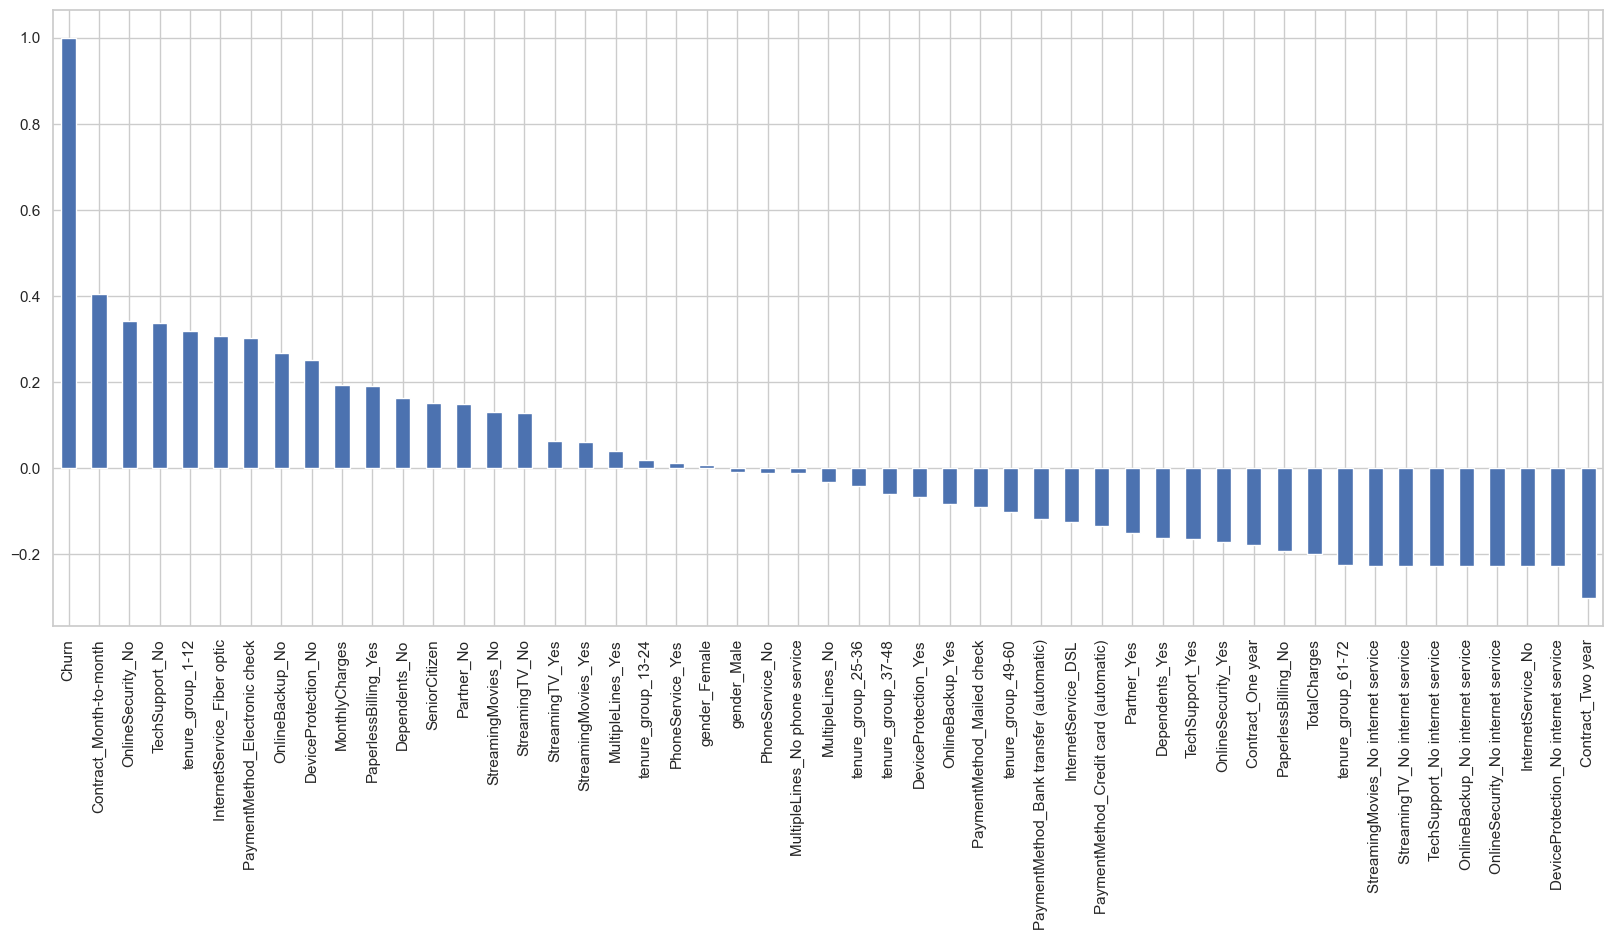

In [32]:
#correlation of all predictors with churn attitude
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

##### High Churn is  related to month to month contract , no online security , no tech support  , first year of subscription and fibre optics internet


#####  Low churn is related to long term contacts , subscriptions without internet service ,, +5 years customers engagement

<Axes: >

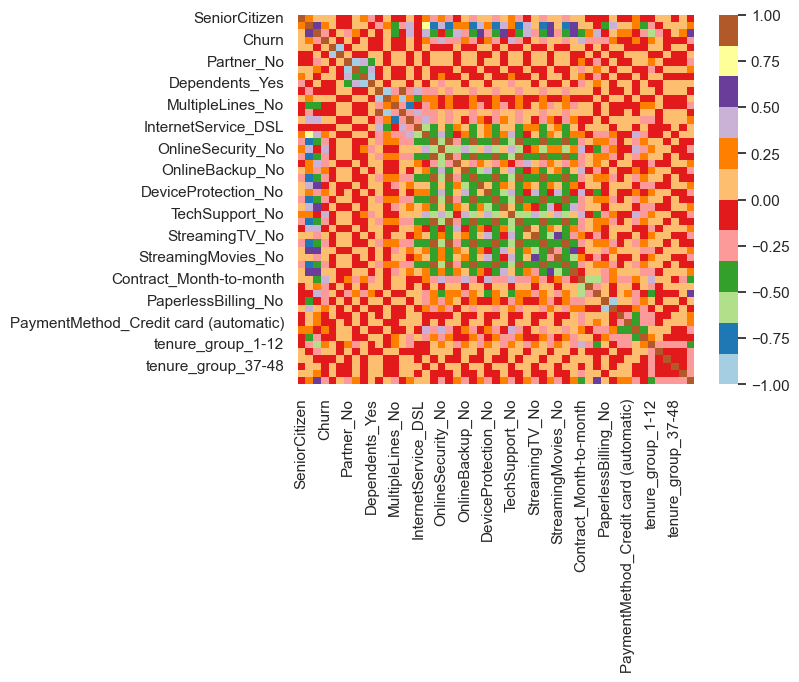

In [33]:
#heatmap
sns.heatmap(df_dummies.corr(),cmap='Paired')

#### Bivaraite Analysis

In [34]:
df_target0=df.loc[df['Churn']==0]
df_target1=df.loc[df['Churn']==1]

In [35]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=20
    plt.rcParams['axes.titlepad']=25
    temp = pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

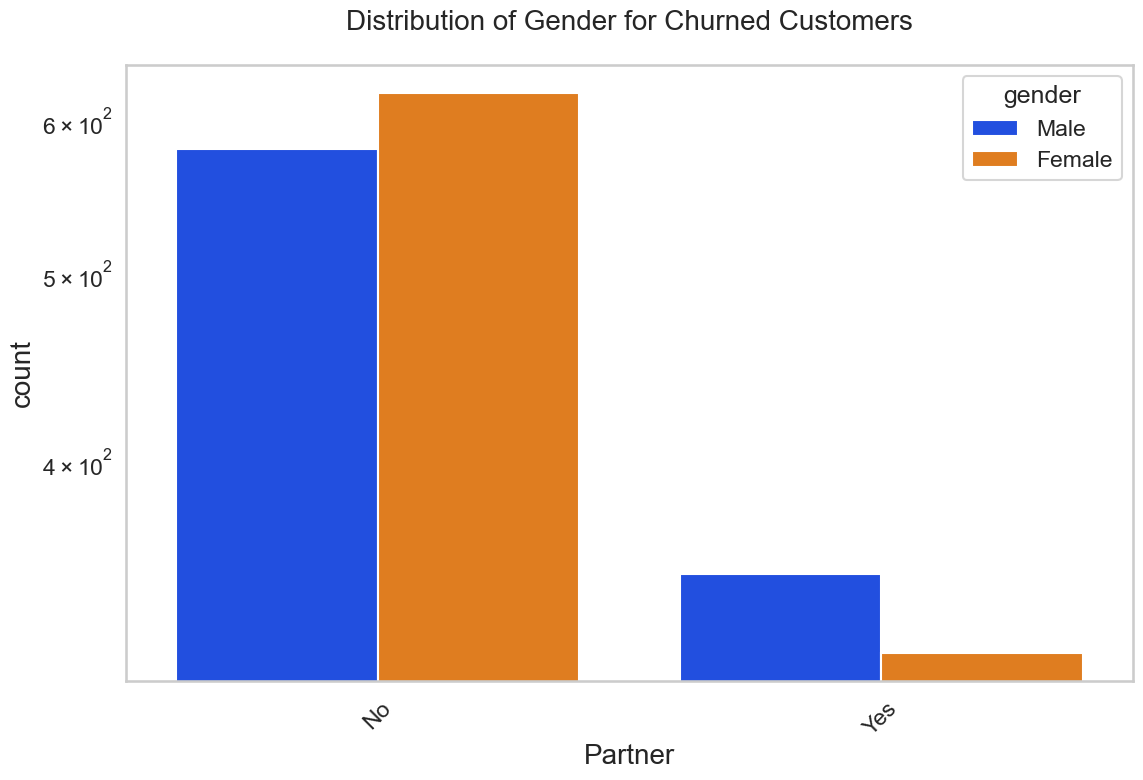

In [36]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

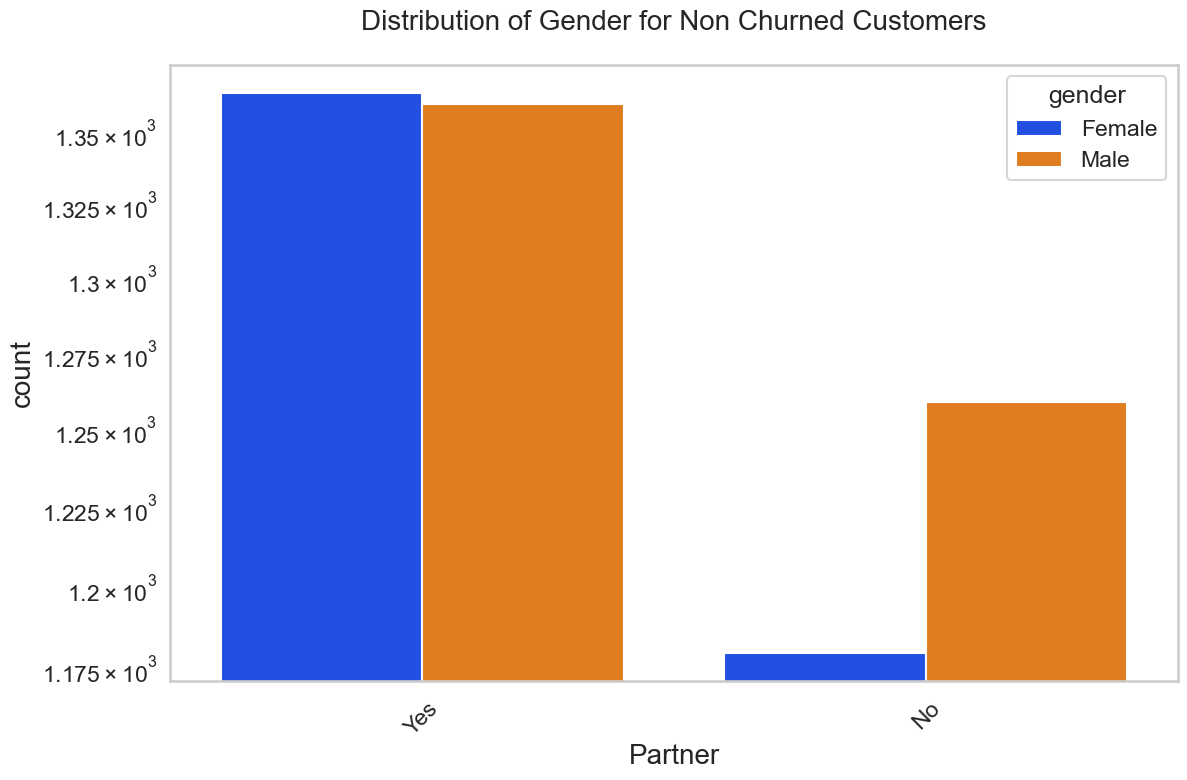

In [37]:
uniplot(df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

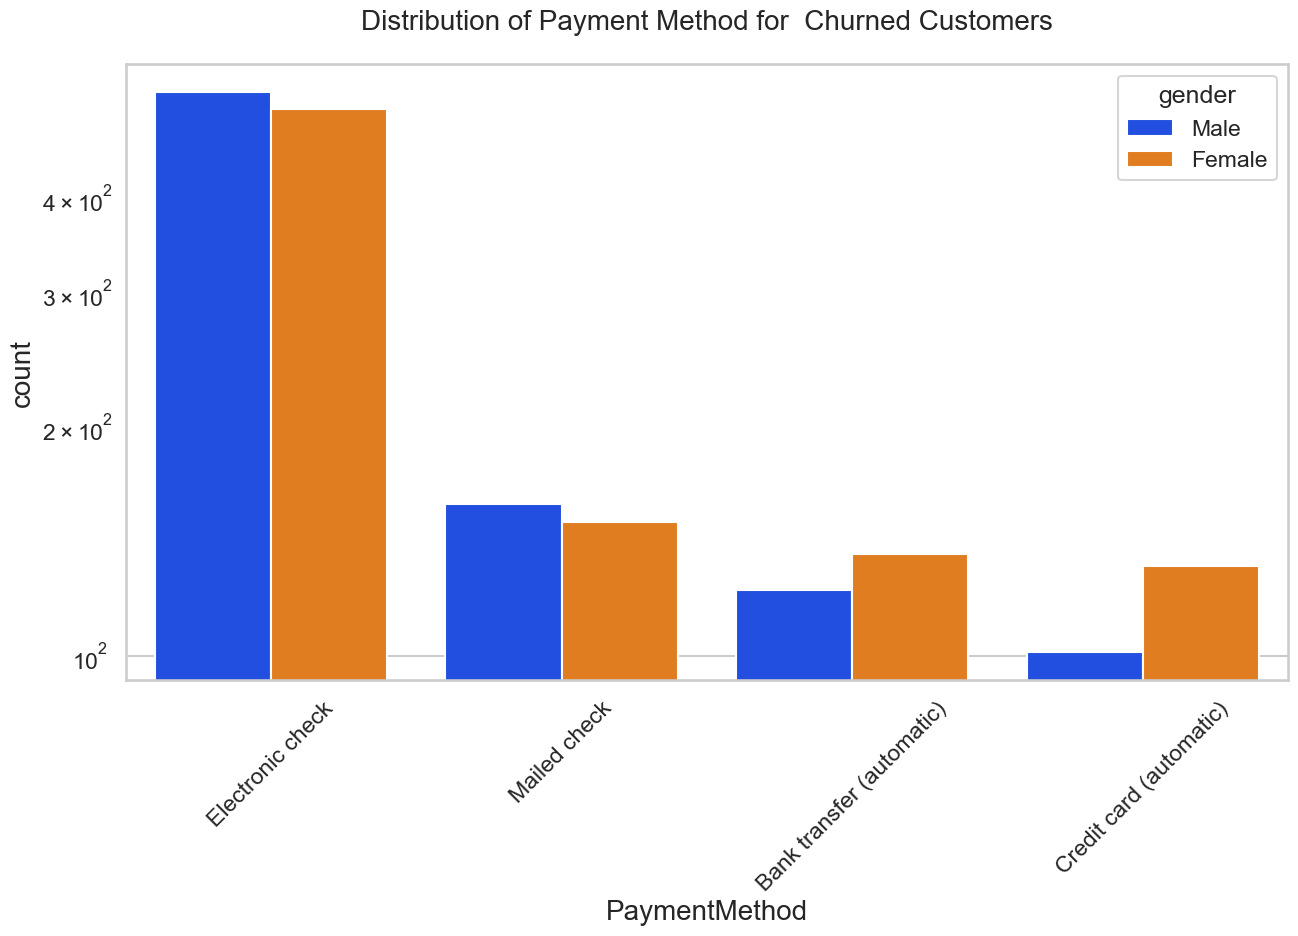

In [40]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of Payment Method for  Churned Customers',hue='gender')

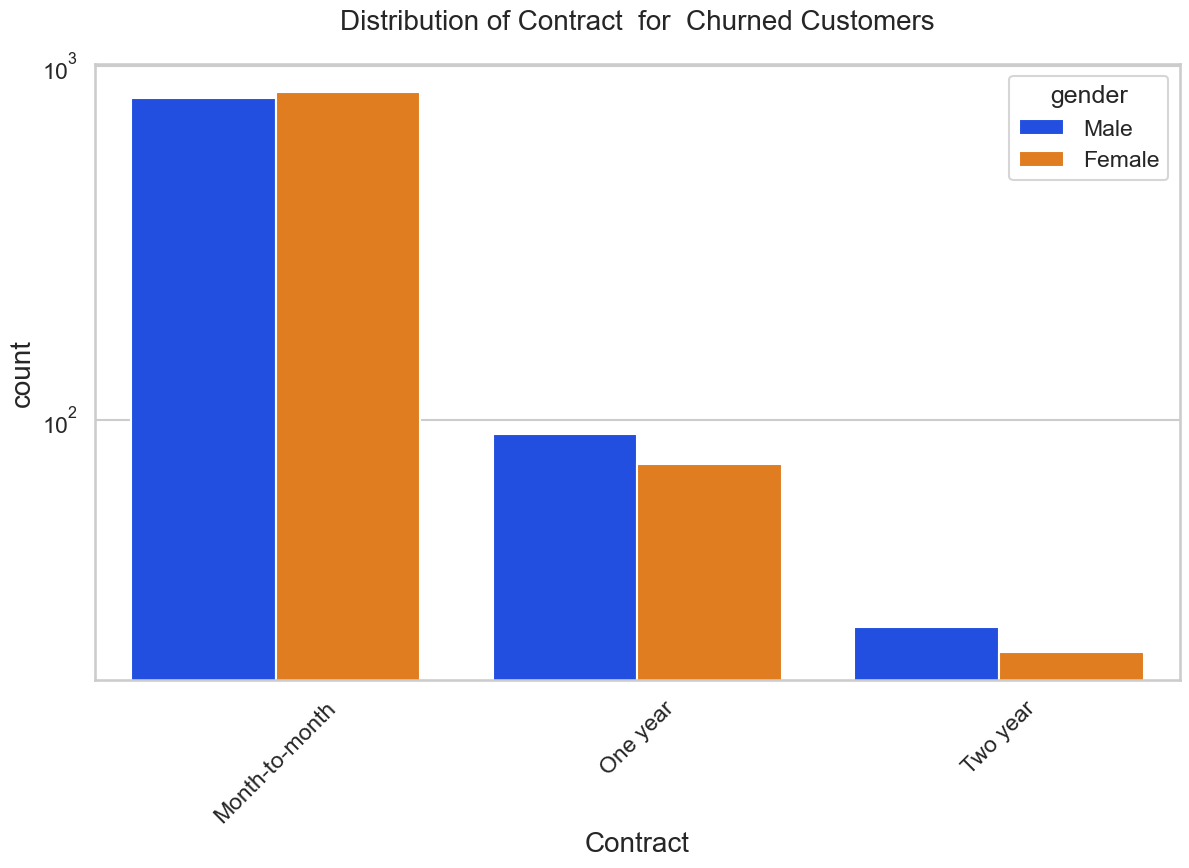

In [41]:
uniplot(df_target1,col='Contract',title='Distribution of Contract  for  Churned Customers',hue='gender')

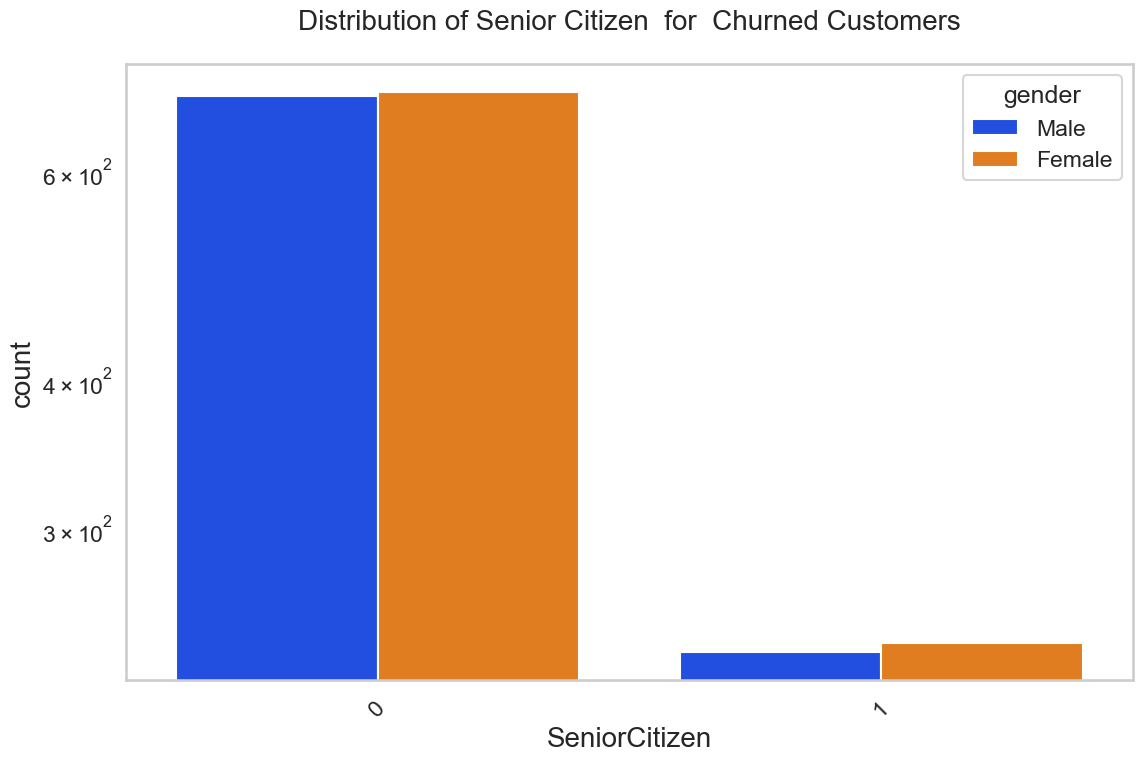

In [42]:
uniplot(df_target1,col='SeniorCitizen',title='Distribution of Senior Citizen  for  Churned Customers',hue='gender')

## Insights : 

###### Customers with Electonic Checks are the highest churners 
##### Monthly Contract Customers are highly Churned Customers 
##### Customers who have not online security , tech support are the highest churns 
##### Customers of Non Senior Citizens are the highest churners

In [43]:
#exporting the new dataframe
df_dummies.to_csv('Telecom_churners.csv')